In [1]:
import sys

sys.path.append("..")

In [2]:
from tensorflow import keras

In [3]:
from utils.preprocessing_utils import PreprocessingUtils

In [4]:
from utils.model_wrapper import ModelWrapper

In [5]:
preprocessing_utils = PreprocessingUtils()

Files already exist, skipping...
Loading images and labels...
Images and labels loaded successfully!
Preprocessing labels...
Labels preprocessed successfully!
Splitting data into train, test and validation sets...
Data split successfully!


In [6]:
def build_caffe_net(model_name: str):
    model = keras.models.Sequential(
        name=model_name,
        layers=[
            keras.layers.Conv2D(
                filters=3, kernel_size=(11, 11), activation="relu", input_shape=preprocessing_utils.images.shape[1:]
            ),
            keras.layers.MaxPooling2D(pool_size=(2, 2)),
            keras.layers.BatchNormalization(),
            keras.layers.Conv2D(
                filters=16, kernel_size=(5, 5), activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)
            ),
            keras.layers.MaxPooling2D(pool_size=(2, 2)),
            keras.layers.BatchNormalization(),
            keras.layers.Conv2D(
                filters=96, kernel_size=(3, 3), activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)
            ),
            keras.layers.MaxPooling2D(pool_size=(2, 2)),
            keras.layers.Flatten(),
            keras.layers.Dense(units=2048, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
            keras.layers.Dense(units=2048, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
            keras.layers.Dense(units=preprocessing_utils.num_classes, activation="softmax"),
        ],
    )

    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    model.summary()

    return model

In [7]:
caffe_net_wrapper = ModelWrapper("CaffeNet", preprocessing_utils=preprocessing_utils)

In [8]:
caffe_net_wrapper.build_model(build_fn=build_caffe_net, model_name=caffe_net_wrapper.model_name)

Building model...
Model: "CaffeNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 246, 246, 3)       1092      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 123, 123, 3)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 123, 123, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 16)      1216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 16)       0         
 2D)                                                             
                                        

In [9]:
caffe_net_wrapper.train_evaluate_and_save_model()

Epoch 1/100
9/9 [==============================] - ETA: 0s - loss: 123.5473 - accuracy: 0.0625
Epoch 1: val_loss improved from inf to 48.47038, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 14s 856ms/step - loss: 123.5473 - accuracy: 0.0625 - val_loss: 48.4704 - val_accuracy: 0.0276
Epoch 2/100
8/9 [=========================>....] - ETA: 0s - loss: 49.0251 - accuracy: 0.0397
Epoch 2: val_loss improved from 48.47038 to 37.97339, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 553ms/step - loss: 48.7517 - accuracy: 0.0396 - val_loss: 37.9734 - val_accuracy: 0.0369
Epoch 3/100
8/9 [=========================>....] - ETA: 0s - loss: 35.3551 - accuracy: 0.0777
Epoch 3: val_loss improved from 37.97339 to 31.78762, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 566ms/step - loss: 35.2670 - accuracy: 0.0786 - val_loss: 31.7876 - val_accuracy: 0.0599
Epoch 4/100
8/9 [=========================>....] - ETA: 0s - loss: 29.2782 - accuracy: 0.1390
Epoch 4: val_loss improved from 31.78762 to 27.82294, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 538ms/step - loss: 29.2033 - accuracy: 0.1406 - val_loss: 27.8229 - val_accuracy: 0.0323
Epoch 5/100
8/9 [=========================>....] - ETA: 0s - loss: 24.0597 - accuracy: 0.1830
Epoch 5: val_loss improved from 27.82294 to 22.90782, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 536ms/step - loss: 23.9997 - accuracy: 0.1837 - val_loss: 22.9078 - val_accuracy: 0.0553
Epoch 6/100
8/9 [=========================>....] - ETA: 0s - loss: 19.8397 - accuracy: 0.2048
Epoch 6: val_loss improved from 22.90782 to 19.94055, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 540ms/step - loss: 19.7978 - accuracy: 0.2024 - val_loss: 19.9406 - val_accuracy: 0.0599
Epoch 7/100
8/9 [=========================>....] - ETA: 0s - loss: 16.6873 - accuracy: 0.2025
Epoch 7: val_loss improved from 19.94055 to 16.46040, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 4s 523ms/step - loss: 16.6471 - accuracy: 0.2041 - val_loss: 16.4604 - val_accuracy: 0.0369
Epoch 8/100
8/9 [=========================>....] - ETA: 0s - loss: 14.1490 - accuracy: 0.2305
Epoch 8: val_loss improved from 16.46040 to 14.01842, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 532ms/step - loss: 14.1180 - accuracy: 0.2316 - val_loss: 14.0184 - val_accuracy: 0.0553
Epoch 9/100
8/9 [=========================>....] - ETA: 0s - loss: 12.2327 - accuracy: 0.2430
Epoch 9: val_loss improved from 14.01842 to 12.32296, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 540ms/step - loss: 12.2208 - accuracy: 0.2428 - val_loss: 12.3230 - val_accuracy: 0.0553
Epoch 10/100
8/9 [=========================>....] - ETA: 0s - loss: 10.8240 - accuracy: 0.2777
Epoch 10: val_loss improved from 12.32296 to 11.33946, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 530ms/step - loss: 10.8095 - accuracy: 0.2778 - val_loss: 11.3395 - val_accuracy: 0.0876
Epoch 11/100
8/9 [=========================>....] - ETA: 0s - loss: 9.8218 - accuracy: 0.2907
Epoch 11: val_loss improved from 11.33946 to 10.53855, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 526ms/step - loss: 9.8104 - accuracy: 0.2907 - val_loss: 10.5386 - val_accuracy: 0.0691
Epoch 12/100
8/9 [=========================>....] - ETA: 0s - loss: 9.1239 - accuracy: 0.2985
Epoch 12: val_loss improved from 10.53855 to 9.91752, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 539ms/step - loss: 9.1189 - accuracy: 0.2970 - val_loss: 9.9175 - val_accuracy: 0.0829
Epoch 13/100
8/9 [=========================>....] - ETA: 0s - loss: 8.5958 - accuracy: 0.3240
Epoch 13: val_loss improved from 9.91752 to 9.71610, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 4s 524ms/step - loss: 8.5890 - accuracy: 0.3245 - val_loss: 9.7161 - val_accuracy: 0.0876
Epoch 14/100
8/9 [=========================>....] - ETA: 0s - loss: 8.1824 - accuracy: 0.3402
Epoch 14: val_loss improved from 9.71610 to 9.26898, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 527ms/step - loss: 8.1821 - accuracy: 0.3396 - val_loss: 9.2690 - val_accuracy: 0.0968
Epoch 15/100
8/9 [=========================>....] - ETA: 0s - loss: 7.9082 - accuracy: 0.3560
Epoch 15: val_loss improved from 9.26898 to 9.09868, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 536ms/step - loss: 7.9073 - accuracy: 0.3559 - val_loss: 9.0987 - val_accuracy: 0.1106
Epoch 16/100
8/9 [=========================>....] - ETA: 0s - loss: 7.5776 - accuracy: 0.4027
Epoch 16: val_loss improved from 9.09868 to 9.09605, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 4s 525ms/step - loss: 7.5835 - accuracy: 0.3982 - val_loss: 9.0961 - val_accuracy: 0.0829
Epoch 17/100
8/9 [=========================>....] - ETA: 0s - loss: 7.5666 - accuracy: 0.3697
Epoch 17: val_loss improved from 9.09605 to 8.74592, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 527ms/step - loss: 7.5635 - accuracy: 0.3695 - val_loss: 8.7459 - val_accuracy: 0.1198
Epoch 18/100
8/9 [=========================>....] - ETA: 0s - loss: 7.2604 - accuracy: 0.4425
Epoch 18: val_loss improved from 8.74592 to 8.67323, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 543ms/step - loss: 7.2569 - accuracy: 0.4425 - val_loss: 8.6732 - val_accuracy: 0.1382
Epoch 19/100
8/9 [=========================>....] - ETA: 0s - loss: 7.0952 - accuracy: 0.4263
Epoch 19: val_loss improved from 8.67323 to 8.29024, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 4s 521ms/step - loss: 7.0957 - accuracy: 0.4259 - val_loss: 8.2902 - val_accuracy: 0.1613
Epoch 20/100
8/9 [=========================>....] - ETA: 0s - loss: 6.8884 - accuracy: 0.4638
Epoch 20: val_loss did not improve from 8.29024
9/9 [==============================] - 2s 163ms/step - loss: 6.8821 - accuracy: 0.4661 - val_loss: 8.4523 - val_accuracy: 0.1521
Epoch 21/100
8/9 [=========================>....] - ETA: 0s - loss: 6.7421 - accuracy: 0.5085
Epoch 21: val_loss improved from 8.29024 to 8.14506, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 4s 529ms/step - loss: 6.7404 - accuracy: 0.5099 - val_loss: 8.1451 - val_accuracy: 0.2028
Epoch 22/100
8/9 [=========================>....] - ETA: 0s - loss: 6.5791 - accuracy: 0.5293
Epoch 22: val_loss improved from 8.14506 to 8.12632, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 540ms/step - loss: 6.5788 - accuracy: 0.5274 - val_loss: 8.1263 - val_accuracy: 0.1889
Epoch 23/100
8/9 [=========================>....] - ETA: 0s - loss: 6.4717 - accuracy: 0.5290
Epoch 23: val_loss improved from 8.12632 to 8.04651, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 4s 521ms/step - loss: 6.4752 - accuracy: 0.5291 - val_loss: 8.0465 - val_accuracy: 0.2120
Epoch 24/100
8/9 [=========================>....] - ETA: 0s - loss: 6.3453 - accuracy: 0.5763
Epoch 24: val_loss improved from 8.04651 to 7.89875, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 4s 522ms/step - loss: 6.3469 - accuracy: 0.5748 - val_loss: 7.8987 - val_accuracy: 0.2074
Epoch 25/100
8/9 [=========================>....] - ETA: 0s - loss: 6.2117 - accuracy: 0.6015
Epoch 25: val_loss did not improve from 7.89875
9/9 [==============================] - 2s 160ms/step - loss: 6.2174 - accuracy: 0.6001 - val_loss: 8.0633 - val_accuracy: 0.1613
Epoch 26/100
8/9 [=========================>....] - ETA: 0s - loss: 6.0112 - accuracy: 0.6430
Epoch 26: val_loss did not improve from 7.89875
9/9 [==============================] - 1s 161ms/step - loss: 6.0110 - accuracy: 0.6434 - val_loss: 7.9085 - val_accuracy: 0.2028
Epoch 27/100
8/9 [=========================>....] - ETA: 0s - loss: 5.8821 - accuracy: 0.6555
Epoch 27: val_loss did not improve from 7.89875
9/9 [==============================] - 1s 160ms/step - loss: 5.8835 - accuracy: 0.6541 - val_loss: 7.9053 - val_accuracy: 0.1843
Epoch 28/100
9/9 [==============================] - ETA: 0

INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 4s 537ms/step - loss: 5.2117 - accuracy: 0.8071 - val_loss: 7.8368 - val_accuracy: 0.2074
Epoch 34/100
8/9 [=========================>....] - ETA: 0s - loss: 5.1587 - accuracy: 0.7993
Epoch 34: val_loss did not improve from 7.83679
9/9 [==============================] - 2s 164ms/step - loss: 5.1563 - accuracy: 0.7991 - val_loss: 7.9889 - val_accuracy: 0.2166
Epoch 35/100
8/9 [=========================>....] - ETA: 0s - loss: 5.0305 - accuracy: 0.8223
Epoch 35: val_loss did not improve from 7.83679
9/9 [==============================] - 1s 160ms/step - loss: 5.0315 - accuracy: 0.8207 - val_loss: 7.8580 - val_accuracy: 0.2304
Epoch 36/100
8/9 [=========================>....] - ETA: 0s - loss: 4.9505 - accuracy: 0.8152
Epoch 36: val_loss did not improve from 7.83679
9/9 [==============================] - 1s 162ms/step - loss: 4.9521 - accuracy: 0.8151 - val_loss: 7.8612 - val_accuracy: 0.1982
Epoch 37/100
8/9 [=========================>....] - ETA: 0

INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 4s 521ms/step - loss: 4.8291 - accuracy: 0.8548 - val_loss: 7.7283 - val_accuracy: 0.2535
Epoch 38/100
8/9 [=========================>....] - ETA: 0s - loss: 4.6835 - accuracy: 0.8745
Epoch 38: val_loss did not improve from 7.72829
9/9 [==============================] - 2s 163ms/step - loss: 4.6866 - accuracy: 0.8723 - val_loss: 7.7716 - val_accuracy: 0.1889
Epoch 39/100
8/9 [=========================>....] - ETA: 0s - loss: 4.5853 - accuracy: 0.8832
Epoch 39: val_loss did not improve from 7.72829
9/9 [==============================] - 1s 162ms/step - loss: 4.5874 - accuracy: 0.8832 - val_loss: 8.0839 - val_accuracy: 0.2120
Epoch 40/100
8/9 [=========================>....] - ETA: 0s - loss: 4.6058 - accuracy: 0.8468
Epoch 40: val_loss did not improve from 7.72829
9/9 [==============================] - 1s 161ms/step - loss: 4.6081 - accuracy: 0.8465 - val_loss: 7.7566 - val_accuracy: 0.1935
Epoch 41/100
8/9 [=========================>....] - ETA: 0

INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 4s 526ms/step - loss: 4.0295 - accuracy: 0.9338 - val_loss: 7.5532 - val_accuracy: 0.1982
Epoch 48/100
8/9 [=========================>....] - ETA: 0s - loss: 3.8964 - accuracy: 0.9348
Epoch 48: val_loss did not improve from 7.55318
9/9 [==============================] - 2s 165ms/step - loss: 3.8922 - accuracy: 0.9360 - val_loss: 7.5712 - val_accuracy: 0.2028
Epoch 49/100
8/9 [=========================>....] - ETA: 0s - loss: 3.7313 - accuracy: 0.9600
Epoch 49: val_loss improved from 7.55318 to 7.31823, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 4s 532ms/step - loss: 3.7306 - accuracy: 0.9596 - val_loss: 7.3182 - val_accuracy: 0.2258
Epoch 50/100
8/9 [=========================>....] - ETA: 0s - loss: 3.6222 - accuracy: 0.9632
Epoch 50: val_loss improved from 7.31823 to 7.28386, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 4s 523ms/step - loss: 3.6221 - accuracy: 0.9633 - val_loss: 7.2839 - val_accuracy: 0.2258
Epoch 51/100
8/9 [=========================>....] - ETA: 0s - loss: 3.5452 - accuracy: 0.9672
Epoch 51: val_loss did not improve from 7.28386
9/9 [==============================] - 2s 163ms/step - loss: 3.5443 - accuracy: 0.9674 - val_loss: 7.5401 - val_accuracy: 0.2120
Epoch 52/100
8/9 [=========================>....] - ETA: 0s - loss: 3.5132 - accuracy: 0.9535
Epoch 52: val_loss did not improve from 7.28386
9/9 [==============================] - 1s 160ms/step - loss: 3.5125 - accuracy: 0.9535 - val_loss: 7.2870 - val_accuracy: 0.2396
Epoch 53/100
8/9 [=========================>....] - ETA: 0s - loss: 3.4178 - accuracy: 0.9705
Epoch 53: val_loss did not improve from 7.28386
9/9 [==============================] - 1s 161ms/step - loss: 3.4164 - accuracy: 0.9703 - val_loss: 7.4655 - val_accuracy: 0.2258
Epoch 54/100
8/9 [=========================>....] - ETA: 0

INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 4s 522ms/step - loss: 3.3590 - accuracy: 0.9630 - val_loss: 7.2491 - val_accuracy: 0.2212
Epoch 55/100
8/9 [=========================>....] - ETA: 0s - loss: 3.3156 - accuracy: 0.9588
Epoch 55: val_loss did not improve from 7.24913
9/9 [==============================] - 2s 162ms/step - loss: 3.3162 - accuracy: 0.9586 - val_loss: 7.2500 - val_accuracy: 0.2028
Epoch 56/100
8/9 [=========================>....] - ETA: 0s - loss: 3.2932 - accuracy: 0.9510
Epoch 56: val_loss did not improve from 7.24913
9/9 [==============================] - 1s 160ms/step - loss: 3.2919 - accuracy: 0.9514 - val_loss: 7.3839 - val_accuracy: 0.2120
Epoch 57/100
8/9 [=========================>....] - ETA: 0s - loss: 3.2879 - accuracy: 0.9535
Epoch 57: val_loss did not improve from 7.24913
9/9 [==============================] - 1s 161ms/step - loss: 3.2892 - accuracy: 0.9531 - val_loss: 7.3535 - val_accuracy: 0.2212
Epoch 58/100
8/9 [=========================>....] - ETA: 0

INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 4s 537ms/step - loss: 3.0694 - accuracy: 0.9365 - val_loss: 7.2199 - val_accuracy: 0.2350
Epoch 67/100
8/9 [=========================>....] - ETA: 0s - loss: 3.0896 - accuracy: 0.9308
Epoch 67: val_loss improved from 7.21994 to 7.12549, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 4s 529ms/step - loss: 3.0892 - accuracy: 0.9312 - val_loss: 7.1255 - val_accuracy: 0.2396
Epoch 68/100
8/9 [=========================>....] - ETA: 0s - loss: 3.0241 - accuracy: 0.9485
Epoch 68: val_loss did not improve from 7.12549
9/9 [==============================] - 2s 159ms/step - loss: 3.0228 - accuracy: 0.9487 - val_loss: 7.3214 - val_accuracy: 0.2258
Epoch 69/100
8/9 [=========================>....] - ETA: 0s - loss: 2.9182 - accuracy: 0.9680
Epoch 69: val_loss did not improve from 7.12549
9/9 [==============================] - 1s 160ms/step - loss: 2.9171 - accuracy: 0.9676 - val_loss: 7.2654 - val_accuracy: 0.2304
Epoch 70/100
8/9 [=========================>....] - ETA: 0s - loss: 2.8385 - accuracy: 0.9690
Epoch 70: val_loss improved from 7.12549 to 6.91589, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 4s 524ms/step - loss: 2.8367 - accuracy: 0.9694 - val_loss: 6.9159 - val_accuracy: 0.2488
Epoch 71/100
8/9 [=========================>....] - ETA: 0s - loss: 2.7517 - accuracy: 0.9812
Epoch 71: val_loss improved from 6.91589 to 6.80393, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 535ms/step - loss: 2.7514 - accuracy: 0.9808 - val_loss: 6.8039 - val_accuracy: 0.2442
Epoch 72/100
8/9 [=========================>....] - ETA: 0s - loss: 2.6739 - accuracy: 0.9827
Epoch 72: val_loss did not improve from 6.80393
9/9 [==============================] - 2s 160ms/step - loss: 2.6728 - accuracy: 0.9827 - val_loss: 6.9876 - val_accuracy: 0.2120
Epoch 73/100
8/9 [=========================>....] - ETA: 0s - loss: 2.6031 - accuracy: 0.9822
Epoch 73: val_loss improved from 6.80393 to 6.69895, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 4s 524ms/step - loss: 2.6031 - accuracy: 0.9822 - val_loss: 6.6990 - val_accuracy: 0.2258
Epoch 74/100
8/9 [=========================>....] - ETA: 0s - loss: 2.5507 - accuracy: 0.9822
Epoch 74: val_loss did not improve from 6.69895
9/9 [==============================] - 2s 162ms/step - loss: 2.5501 - accuracy: 0.9825 - val_loss: 6.8931 - val_accuracy: 0.2396
Epoch 75/100
8/9 [=========================>....] - ETA: 0s - loss: 2.4922 - accuracy: 0.9855
Epoch 75: val_loss improved from 6.69895 to 6.64590, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 4s 524ms/step - loss: 2.4917 - accuracy: 0.9854 - val_loss: 6.6459 - val_accuracy: 0.1935
Epoch 76/100
8/9 [=========================>....] - ETA: 0s - loss: 2.4343 - accuracy: 0.9865
Epoch 76: val_loss improved from 6.64590 to 6.58797, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 535ms/step - loss: 2.4349 - accuracy: 0.9861 - val_loss: 6.5880 - val_accuracy: 0.2442
Epoch 77/100
8/9 [=========================>....] - ETA: 0s - loss: 2.3962 - accuracy: 0.9820
Epoch 77: val_loss did not improve from 6.58797
9/9 [==============================] - 2s 162ms/step - loss: 2.3965 - accuracy: 0.9820 - val_loss: 6.7189 - val_accuracy: 0.1843
Epoch 78/100
8/9 [=========================>....] - ETA: 0s - loss: 2.3973 - accuracy: 0.9770
Epoch 78: val_loss did not improve from 6.58797
9/9 [==============================] - 1s 161ms/step - loss: 2.3991 - accuracy: 0.9762 - val_loss: 6.9487 - val_accuracy: 0.2535
Epoch 79/100
8/9 [=========================>....] - ETA: 0s - loss: 2.5064 - accuracy: 0.9383
Epoch 79: val_loss did not improve from 6.58797
9/9 [==============================] - 1s 160ms/step - loss: 2.5058 - accuracy: 0.9387 - val_loss: 7.0388 - val_accuracy: 0.2028
Epoch 80/100
8/9 [=========================>....] - ETA: 0

INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 4s 526ms/step - loss: 2.2205 - accuracy: 0.9822 - val_loss: 6.5425 - val_accuracy: 0.2488
Epoch 88/100
8/9 [=========================>....] - ETA: 0s - loss: 2.1295 - accuracy: 0.9895
Epoch 88: val_loss did not improve from 6.54254
9/9 [==============================] - 2s 162ms/step - loss: 2.1281 - accuracy: 0.9898 - val_loss: 6.5826 - val_accuracy: 0.2120
Epoch 89/100
8/9 [=========================>....] - ETA: 0s - loss: 2.0635 - accuracy: 0.9902
Epoch 89: val_loss did not improve from 6.54254
9/9 [==============================] - 1s 161ms/step - loss: 2.0631 - accuracy: 0.9898 - val_loss: 6.5468 - val_accuracy: 0.1982
Epoch 90/100
8/9 [=========================>....] - ETA: 0s - loss: 2.0344 - accuracy: 0.9872
Epoch 90: val_loss improved from 6.54254 to 6.43496, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 4s 531ms/step - loss: 2.0342 - accuracy: 0.9874 - val_loss: 6.4350 - val_accuracy: 0.2304
Epoch 91/100
8/9 [=========================>....] - ETA: 0s - loss: 1.9954 - accuracy: 0.9890
Epoch 91: val_loss did not improve from 6.43496
9/9 [==============================] - 2s 161ms/step - loss: 1.9956 - accuracy: 0.9891 - val_loss: 6.5249 - val_accuracy: 0.2120
Epoch 92/100
8/9 [=========================>....] - ETA: 0s - loss: 1.9647 - accuracy: 0.9883
Epoch 92: val_loss did not improve from 6.43496
9/9 [==============================] - 1s 160ms/step - loss: 1.9642 - accuracy: 0.9878 - val_loss: 6.4355 - val_accuracy: 0.2258
Epoch 93/100
8/9 [=========================>....] - ETA: 0s - loss: 1.9280 - accuracy: 0.9868
Epoch 93: val_loss improved from 6.43496 to 6.34339, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 4s 537ms/step - loss: 1.9277 - accuracy: 0.9866 - val_loss: 6.3434 - val_accuracy: 0.2120
Epoch 94/100
8/9 [=========================>....] - ETA: 0s - loss: 1.9064 - accuracy: 0.9875
Epoch 94: val_loss did not improve from 6.34339
9/9 [==============================] - 2s 161ms/step - loss: 1.9056 - accuracy: 0.9878 - val_loss: 6.3461 - val_accuracy: 0.2166
Epoch 95/100
8/9 [=========================>....] - ETA: 0s - loss: 1.8689 - accuracy: 0.9937
Epoch 95: val_loss improved from 6.34339 to 6.09028, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 4s 532ms/step - loss: 1.8695 - accuracy: 0.9932 - val_loss: 6.0903 - val_accuracy: 0.2212
Epoch 96/100
9/9 [==============================] - ETA: 0s - loss: 1.9009 - accuracy: 0.9708
Epoch 96: val_loss did not improve from 6.09028
9/9 [==============================] - 2s 169ms/step - loss: 1.9009 - accuracy: 0.9708 - val_loss: 6.6190 - val_accuracy: 0.1935
Epoch 97/100
8/9 [=========================>....] - ETA: 0s - loss: 1.9741 - accuracy: 0.9490
Epoch 97: val_loss did not improve from 6.09028
9/9 [==============================] - 2s 163ms/step - loss: 1.9736 - accuracy: 0.9492 - val_loss: 6.7522 - val_accuracy: 0.1843
Epoch 98/100
8/9 [=========================>....] - ETA: 0s - loss: 2.0265 - accuracy: 0.9415
Epoch 98: val_loss did not improve from 6.09028
9/9 [==============================] - 1s 161ms/step - loss: 2.0256 - accuracy: 0.9419 - val_loss: 7.1023 - val_accuracy: 0.2028
Epoch 99/100
8/9 [=========================>....] - ETA: 0

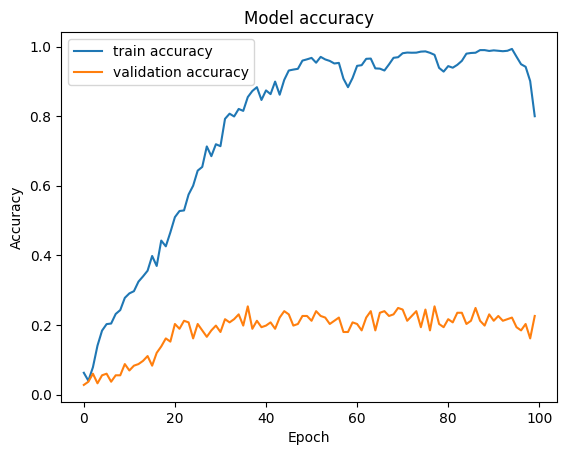

In [10]:
caffe_net_wrapper.plot_accuracy()

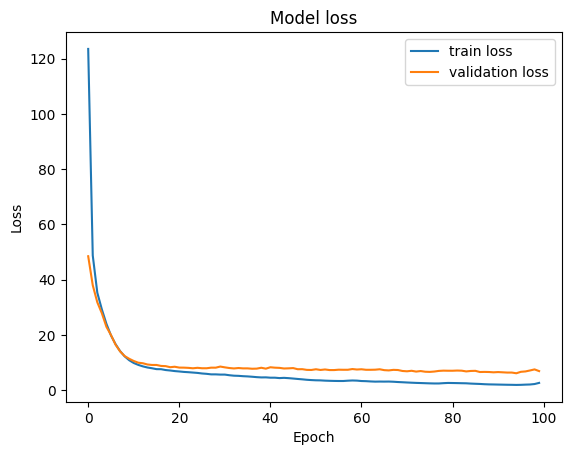

In [11]:
caffe_net_wrapper.plot_loss()

20/20 [==============================] - 0s 6ms/step


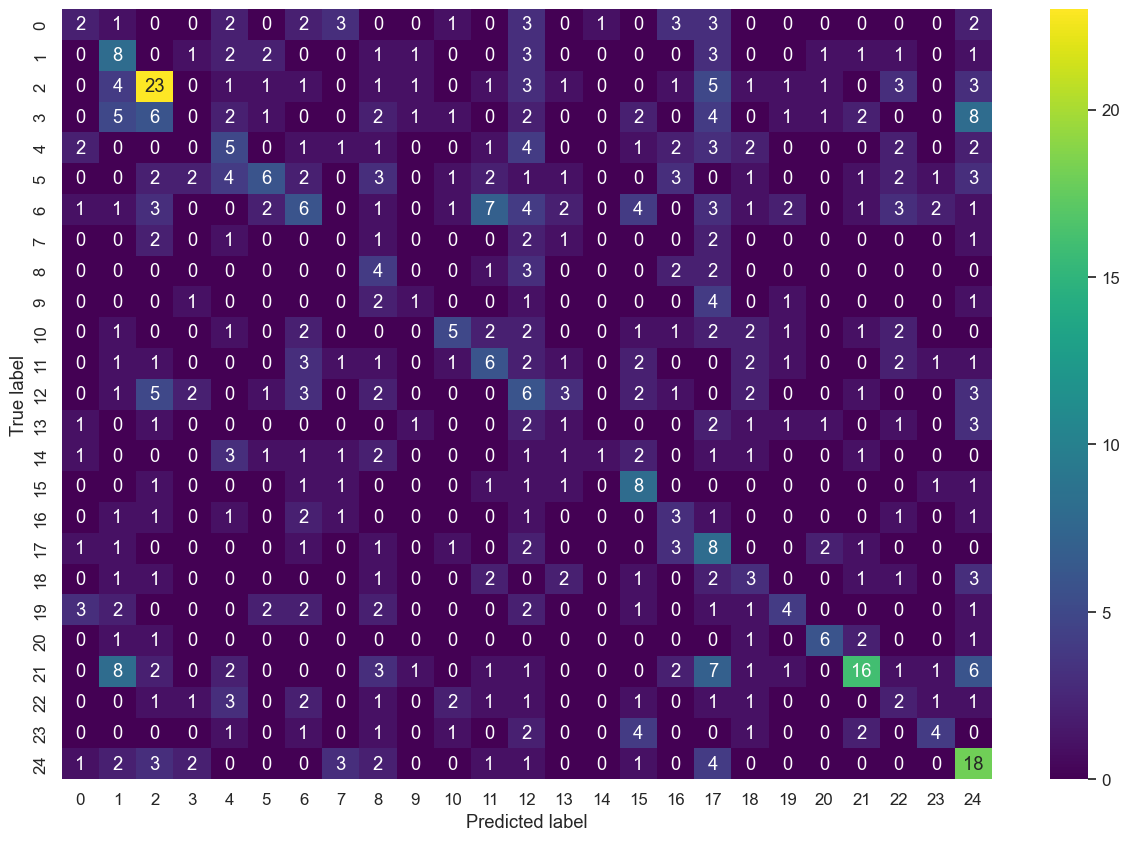

In [12]:
caffe_net_wrapper.display_confusion_matrix()